In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
%%bash

ls /data/baseline_performances

681640
Axitinib
AZ628
AZD7762
Bosutinib
Camptothecin
CHIR-99021
Embelin
Gefitinib
JQ1
KU-55933
MK-2206
RO-3306
Sorafenib


In [4]:
datapath = Path("/data/baseline_performances")

In [5]:
%%time

results = {}
for outer_directory in datapath.glob("*"): 
    drug = outer_directory.stem
    results[drug] = {}
    
    for inner_directory in outer_directory.glob("*"): 
        tissue = inner_directory.stem
        results[drug][tissue] = {}
        
        data = np.load(inner_directory / "baseline_performance.npz")
        
        for model in ['linear', 'KNN', 'RF']: 
            zero = data[f"{model}-zero"]
            zero = np.vstack([zero for _ in range(10)]) # There is only 1 possible zero-shot, so expanding for all trials
            performance = np.median(np.hstack([zero, data[f"{model}-fewshot"]]), axis=0)
            
            results[drug][tissue][model] = performance    

CPU times: user 35 ms, sys: 4.28 ms, total: 39.3 ms
Wall time: 39.6 ms


## Collapsing across all results

In [17]:
results_by_baseline = {'linear': [], 'KNN': [], 'RF': []}

for drug, d in results.items(): 
    for tissue, d in d.items(): 
        for model, p in d.items(): 
            p = np.nan_to_num(p)
            results_by_baseline[model].append(p)
            
for model, ps in results_by_baseline.items(): 
    results_by_baseline[model] = np.vstack(ps)

[Text(0, 0, 'Pretrained'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10')]

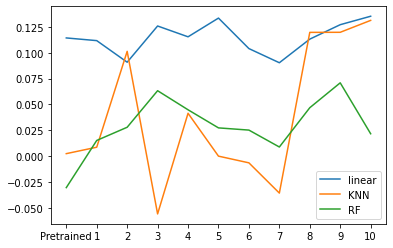

In [20]:
%matplotlib inline
fig, ax = plt.subplots()

for model, ps in results_by_baseline.items(): 
    ax.plot(np.arange(11), np.mean(ps, axis=0), label=model)
    
ax.legend()
labels = ['Pretrained'] + [str(i) for i in range(1, 11)]
ax.set_xticks(np.arange(11))
ax.set_xticklabels(labels)

In [11]:
ax.plot

{'linear': array([[ 0.34346904,  0.70203702,  0.71641197,  0.69668642,  0.79386194,
          0.74050715,  0.58870303,  0.80938939,  0.80858577,  0.74216906,
          0.74041694],
        [ 0.14213148, -0.03141201, -0.22663464, -0.09725043, -0.3379531 ,
         -0.22573264, -0.31014066, -0.58999454, -0.50959682, -0.51240969,
         -0.49874174],
        [ 0.29303942,  0.21002643,  0.24438987,  0.24412829,  0.24572517,
          0.24461605,  0.20955598,  0.19978517,  0.2035562 ,  0.16079951,
          0.17655528],
        [-0.05636964, -0.05804371, -0.1313264 , -0.06592179, -0.21394384,
         -0.12248827, -0.12890076, -0.07885934, -0.04649432, -0.02050207,
         -0.01911954],
        [ 0.34216212,  0.22488621,  0.23056695,  0.29142978,  0.31633958,
          0.28560696,  0.18862758,  0.16922966,  0.20076686,  0.23298948,
          0.16921271],
        [ 0.11473208,  0.18415652,  0.217362  ,  0.14176861,  0.16510478,
          0.06151931,  0.12093172,  0.00803309, -0.07722547, 